<a href="https://colab.research.google.com/github/issatyajit/hotel-data-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Hotel Bookings.csv')

In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.loc[ df['adr'] < 1, 'adr'] = np.nan

In [7]:
df['adr'].describe()

count    117428.000000
mean        103.532575
std          49.197298
min           1.000000
25%          70.530000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [8]:
df['offspring']=df['children']+df['babies']

In [9]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [10]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
#get month in number
month_num = {'January':1 ,'February':2 ,'March':3 ,'April':4 ,'May':5 ,'June':6 ,'July':7 ,'August':8 ,'September':9 ,'October':10 ,'November':11 ,'December':12}
def get_month_num(month):
  m=month_num.get(month)
  return m

In [12]:
month_num.get(df['arrival_date_month'][0])

7

In [13]:
df['month_num']=df['arrival_date_month'].apply(get_month_num)

In [14]:
df['Full Date'] = df['arrival_date_day_of_month'].map(str) + '-' + df['month_num'].map(str) + '-' + df['arrival_date_year'].map(str)

In [15]:
df['Nights spent']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,offspring,month_num,Full Date,Nights spent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,NaN,0,0,Check-Out,2015-07-01,0.0,7,1-7-2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,NaN,0,0,Check-Out,2015-07-01,0.0,7,1-7-2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,7,1-7-2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,7,1-7-2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,0.0,7,1-7-2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,0.0,8,30-8-2017,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,0.0,8,31-8-2017,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,0.0,8,31-8-2017,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,0.0,8,31-8-2017,7


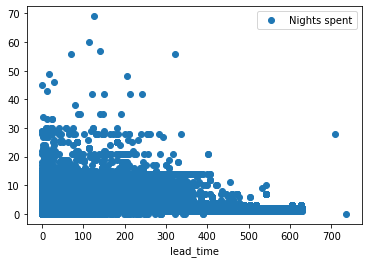

In [ ]:
#lead time analysis
df1=df[['lead_time','Nights spent']].sort_values(by=['Nights spent','lead_time'], ascending=True)
df1.plot(x='lead_time', y='Nights spent', style='o')
#obervation:most of the bookings are made in 17 days lead time and occupied for 0-20 days.

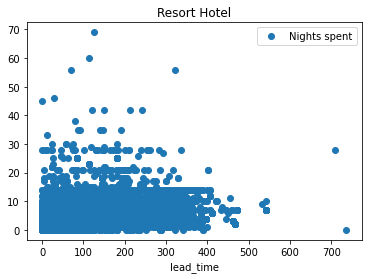

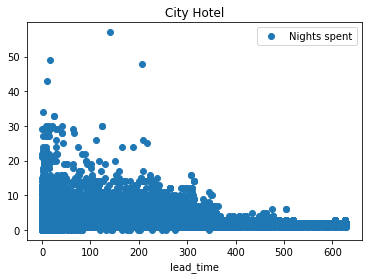

In [ ]:
#next lets find lead time vs nights spent for resort and city hotels separately
#for resprt hotel
df[df['hotel']=='Resort Hotel'][['Nights spent','lead_time']].plot(x='lead_time', y='Nights spent', style='o',title='Resort Hotel')
df[df['hotel']=='City Hotel'][['Nights spent','lead_time']].plot(x='lead_time', y='Nights spent', style='o',title='City Hotel')
#observation: People booking the hotel right before visiting are spending more time in city hotels than city hotel
#so we have realised that most people for resort hotel are booking 17 days before visiting and staying for 15 days mostly

(0.0, 550.0)

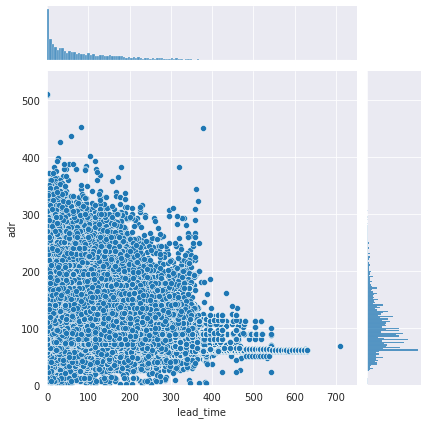

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
plot1=sns.jointplot(x='lead_time', y='adr', data=df)
plot1.ax_marg_x.set_xlim(0, 750)
plot1.ax_marg_y.set_ylim(0, 550)
#observation: most of the customers have almost negligible lead time and price paid is around70-80 for most customers

Text(0.5, 1.0, 'Hotel : lead_time vs adr')

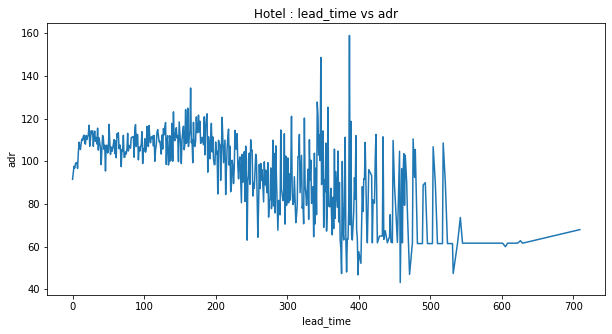

In [44]:
#let us see the avg price for lead time
df1=df[['lead_time','adr']].dropna().groupby(['lead_time']).agg({'adr':'mean'}).sort_values(by=['lead_time'],ascending=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('Hotel : lead_time vs adr')

Text(0.5, 1.0, 'Resort Hotel : lead_time vs adr')

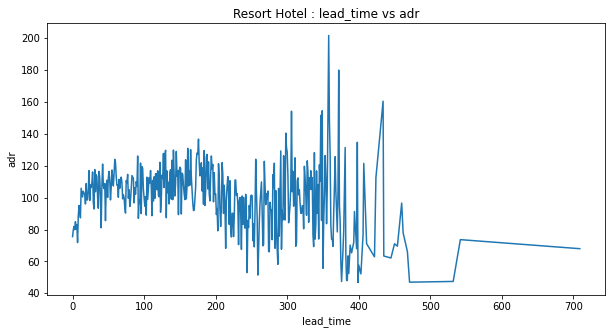

In [43]:
df1=df[df['hotel']=='Resort Hotel'][['lead_time','adr']].dropna().sort_values(by=['lead_time'],ascending=True).groupby(['lead_time']).agg({'adr':'mean'})
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('Resort Hotel : lead_time vs adr')

Text(0.5, 1.0, 'City Hotel : lead_time vs adr')

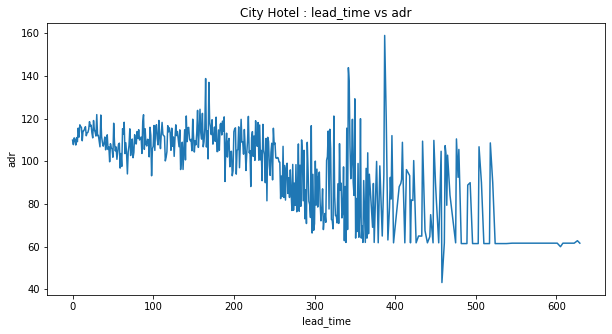

In [45]:
df1=df[df['hotel']=='City Hotel'][['lead_time','adr']].dropna().sort_values(by=['lead_time'],ascending=True).groupby(['lead_time']).agg({'adr':'mean'})
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('City Hotel : lead_time vs adr')

([<matplotlib.patches.Wedge at 0x7fc4a9702d50>,
 [Text(0.6653672192649289, 0.875948893216754, '2015'),
  Text(-1.0597723962974992, 0.29475832141918634, '2016'),
  Text(0.4063133565829729, -1.0222081276639694, '2017')])

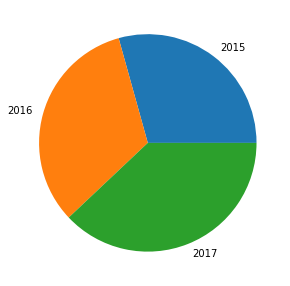

In [54]:
#next lets see what is the average revenue generated per year and per month
df1=df[['arrival_date_year','adr']].dropna().groupby(['arrival_date_year']).agg({'adr':'mean'}).sort_values(by=['arrival_date_year'],ascending=True)
my_labels='2015','2016','2017'
plt.pie(df1['adr'],labels=my_labels)

Text(0.5, 0, 'Month')

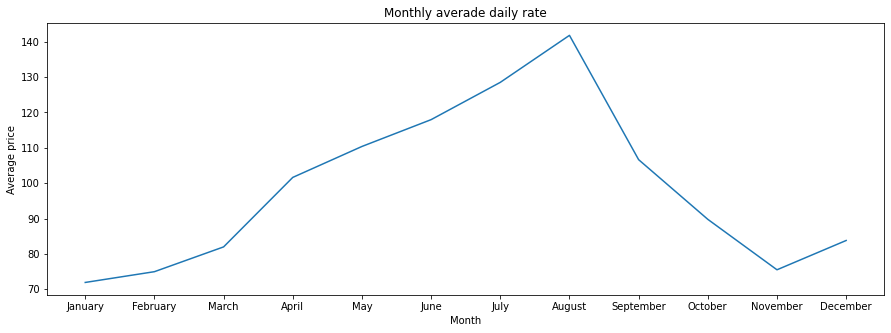

In [69]:
#monthly adr for all hotels
df1=df[['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
plt.plot(df2)
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('Monthly averade daily rate')
plt.ylabel('Average price')
plt.xlabel('Month')

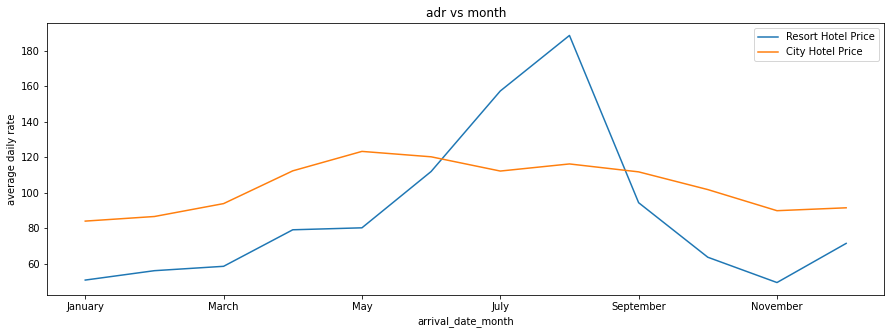

In [96]:
#monthly adr for resorts
df3=df[df['hotel']=='Resort Hotel'][['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True).reindex(new_order, axis=0)
df4=df[df['hotel']=='City Hotel'][['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True).reindex(new_order, axis=0)
df3.rename(columns = {'adr':'Resort Hotel Price'}, inplace = True)
df4.rename(columns = {'adr':'City Hotel Price'}, inplace = True)
ax = df3.plot()
df4.plot(ax=ax,ylabel='average daily rate',title='adr vs month')